In [1]:
# import libraries neeeded for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from utils import correlation_plot, snv_transform


In [2]:
# import the data and understand the structure of the data
penguine = pd.read_csv('penguins.csv')

# show head of the data
penguine.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# show the shape and data types of the data
print(penguine.shape)
print(penguine.dtypes)
print(penguine.info())

(344, 7)
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [4]:
# Is missing data present in the dataframe
print(penguine.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [5]:
# find the duplicates in the data
duplicates = penguine.duplicated()
print(duplicates.sum())

nun_data = penguine.isnull().sum()
print(nun_data)

0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
#convert empty strings to NaN
penguine_new = penguine.replace(r'^\s*$', np.nan, regex=True)
penguine_new.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
# drop NA values
penguine_clean = penguine.dropna(subset=["sex"])   
penguine_clean.head()
print(penguine_clean.shape)

(333, 7)


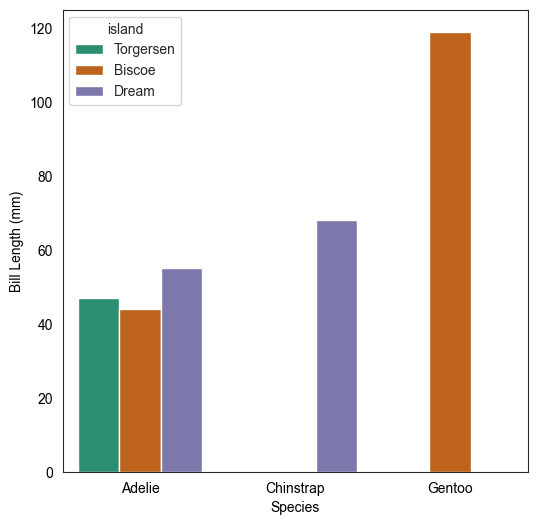

In [8]:
plt.figure(figsize=(6, 6))
sns.set_style("white")

sns.countplot(data=penguine_clean, x='species', hue="island", palette='Dark2')
plt.xlabel('Species', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.ylabel('Bill Length (mm)', color='black')

plt.show()

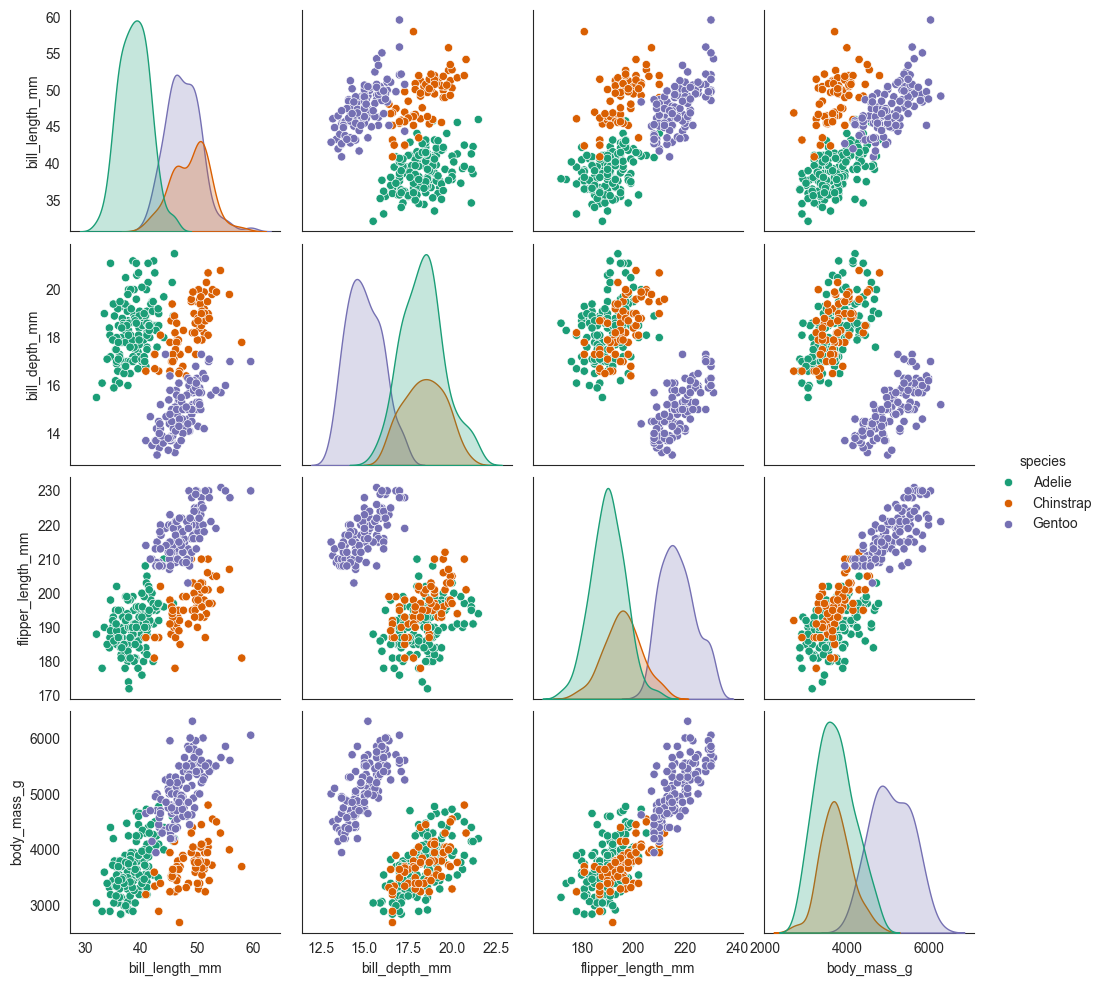

In [9]:
# pair plot of the data
sns.pairplot(penguine_clean, hue='species', palette='Dark2')

plt.show()

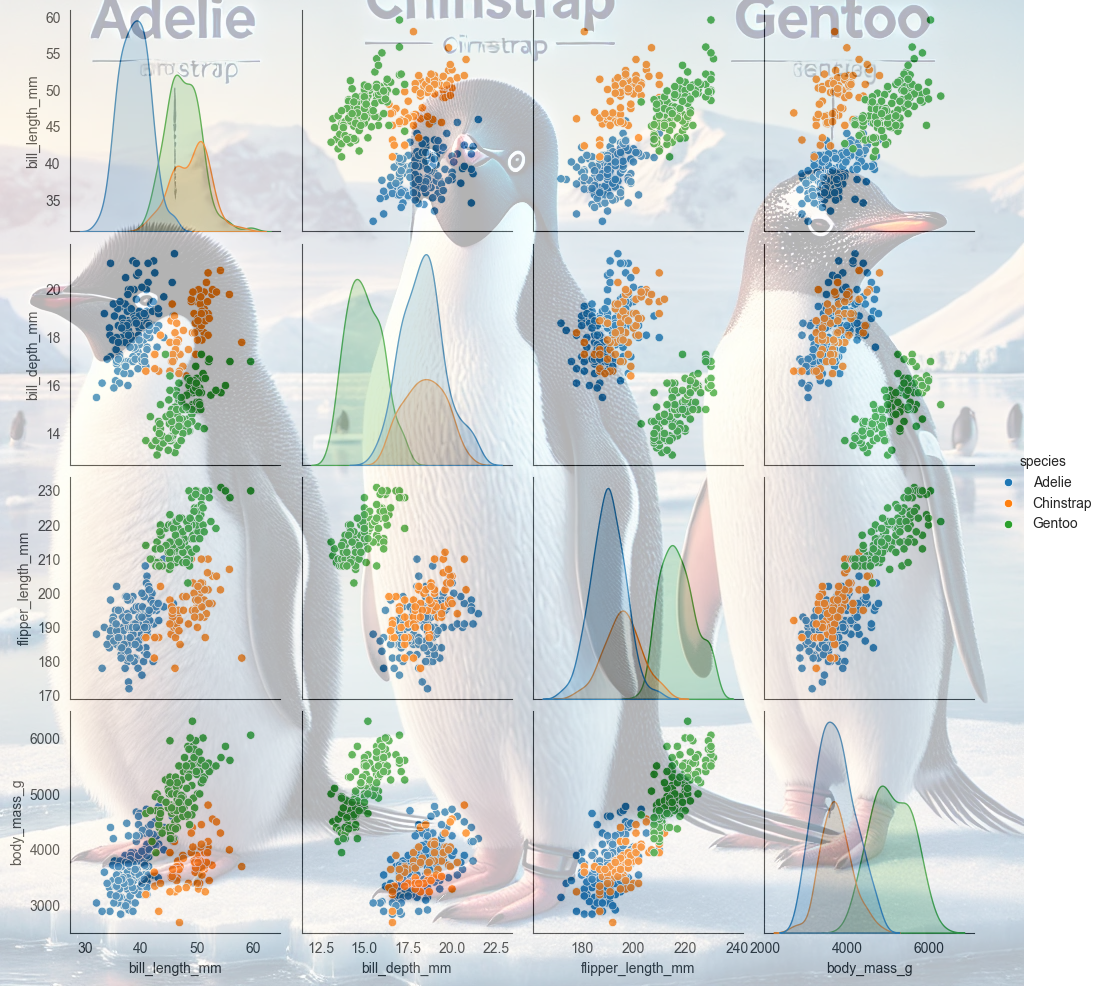

In [10]:
# overlay penguin image on the pair plot
from PIL import Image

# Load an image file
image_path = "penguins_img.webp"
penguin_image = Image.open(image_path)

g = sns.pairplot(penguine_clean, hue='species', palette='tab10')

# Add the image to the figure
fig = g.fig
fig.figimage(penguin_image, xo=0, yo=0, alpha=0.3, zorder=1)

#


plt.show()

### About the 3 penguin species
** Gentoo: Fastest swimming penguins, 3rd largest penguin species. Each gentoo has a unique call
** Adelie: Migrate to follow the sun. Named after the wife of french explorer. 
** Chinstrap: Named after thier distict black head. Water proof penguins. Are aggrissive and grumpy.

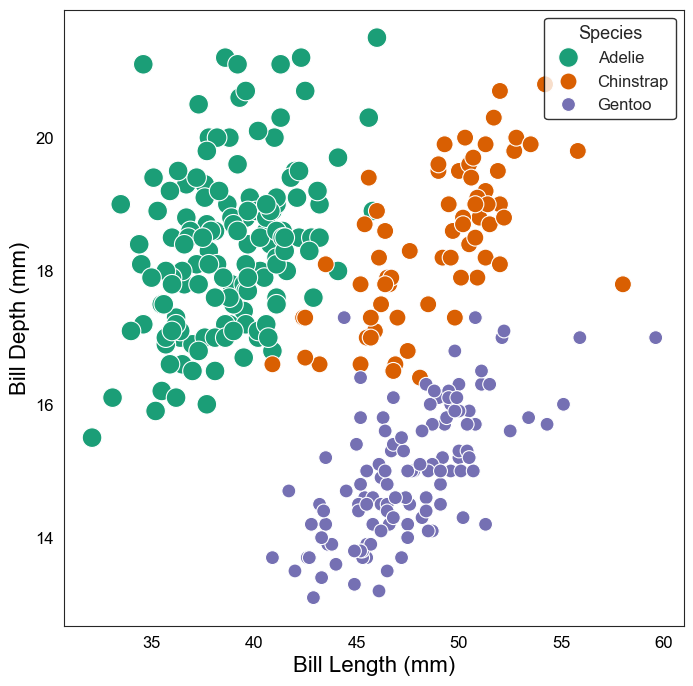

In [11]:
# Scatter Plot of data
plt.figure(figsize=(8, 8))
sns.set_style("white")

sns.scatterplot(data=penguine_clean, x='bill_length_mm', y='bill_depth_mm', 
                hue='species', palette='Dark2', 
                size='species', sizes=(100, 200))

plt.xlabel('Bill Length (mm)', color='black', fontsize= 16)
plt.xticks(color='black', size=12)
plt.yticks(color='black', size = 12)
plt.ylabel('Bill Depth (mm)', color='black', fontsize = 16)

plt.legend(title='Species', title_fontsize='13', 
           fontsize='12', loc='upper right', 
           facecolor= 'white',
           edgecolor='black',  shadow=False)

plt.show()

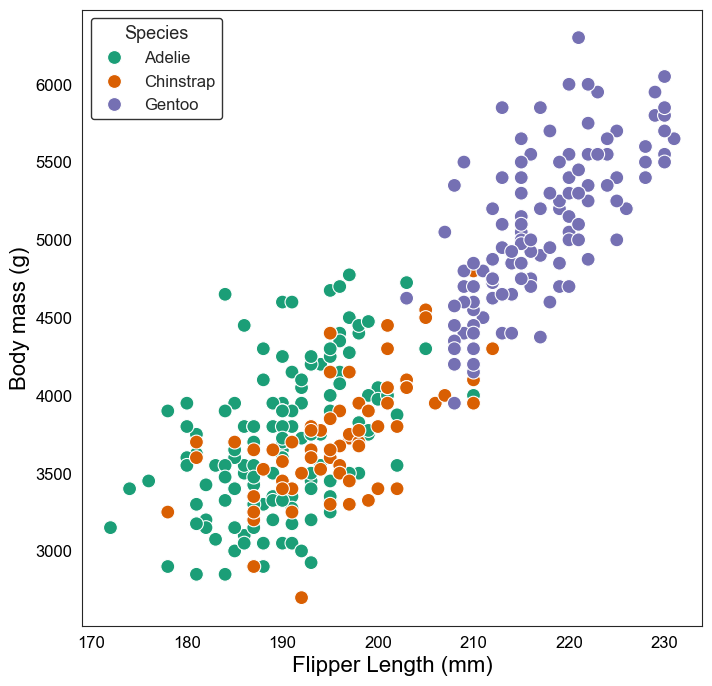

In [12]:
# Scatter Plot of data
plt.figure(figsize=(8, 8))
sns.set_style("white")

sns.scatterplot(data=penguine_clean, x='flipper_length_mm', y="body_mass_g", 
                hue='species', palette='Dark2', 
                s=100)

plt.xlabel('Flipper Length (mm)', color='black', fontsize= 16)
plt.ylabel('Body mass (g)', color='black', fontsize = 16)
plt.xticks(color='black', size=12)
plt.yticks(color='black', size = 12)


plt.legend(title='Species', title_fontsize='13', 
           fontsize='12', loc='upper left', 
           facecolor= 'white',
           edgecolor='black',  shadow=False)

plt.show()

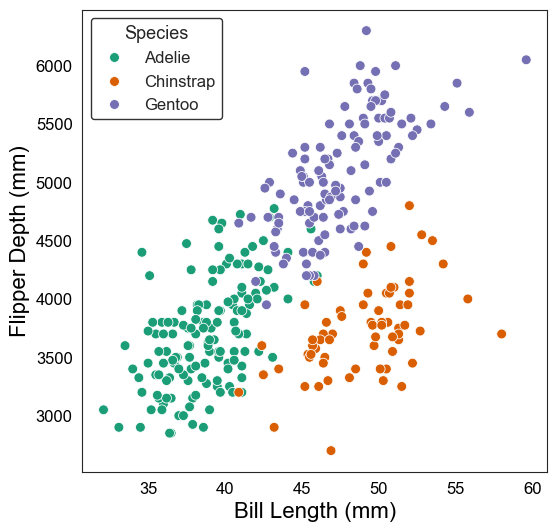

In [13]:
# Scatter Plot of data
plt.figure(figsize=(6, 6))
sns.set_style("white")

sns.scatterplot(data=penguine_clean, x='bill_length_mm', y="body_mass_g", 
                hue='species', palette='Dark2', 
                s=50)

plt.xlabel('Bill Length (mm)', color='black', fontsize= 16)
plt.ylabel('Flipper Depth (mm)', color='black', fontsize = 16)
plt.xticks(color='black', size=12)
plt.yticks(color='black', size = 12)


plt.legend(title='Species', title_fontsize='13', 
           fontsize='12', loc='upper left', 
           facecolor= 'white',
           edgecolor='black',  shadow=False)

plt.show()

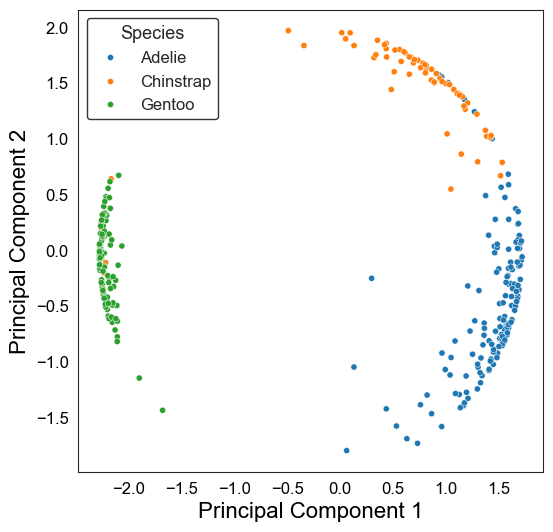

In [14]:
# using PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from snv_transform import snv_transform

# define the features
features = penguine_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
#print(features.head())

# Scale the features because of the different units
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply the SNV transformation
features_scaled_snv = snv_transform(features_scaled)

# Apply PCA
pca = PCA(n_components=2)
pca.fit(features_scaled_snv)
pca_features = pca.transform(features_scaled_snv)

# Create a DataFrame with the PCA features
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df['species'] = penguine_clean['species']

# Plot the PCA features
plt.figure(figsize=(6, 6))
sns.set_style("white")

sns.scatterplot(data=pca_df, x='PC1', 
                y='PC2',  
                hue='species', palette='tab10', 
                s=20)

plt.xlabel('Principal Component 1', color='black', fontsize= 16)
plt.ylabel('Principal Component 2', color='black', fontsize = 16)

plt.xticks(color='black', size=12)
plt.yticks(color='black', size = 12)

plt.legend(title='Species', title_fontsize='13',
              fontsize='12', loc='upper left', 
              facecolor= 'white',
              edgecolor='black',  shadow=False) 

plt.show()


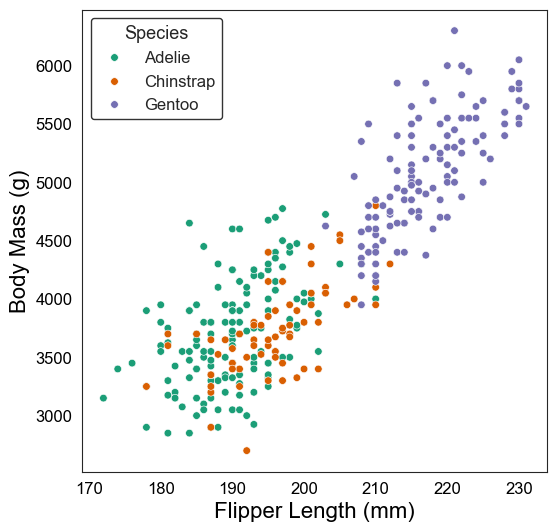

In [15]:
# Correlation plot of the data
plt.figure(figsize=(6, 6))
sns.set_style("white")

# calculate r2 and r of the data
sns.scatterplot(data=penguine_clean, x='flipper_length_mm', y="body_mass_g", 
                hue="species",
                palette='Dark2', 
                s=30)

plt.xlabel('Flipper Length (mm)', color='black', fontsize= 16)
plt.ylabel('Body Mass (g)', color='black', fontsize = 16)

plt.xticks(color='black', size=12)
plt.yticks(color='black', size = 12)


plt.legend(title='Species', title_fontsize='13', 
           fontsize='12', loc='upper left', 
           facecolor= 'white',
           edgecolor='black',  shadow=False)

plt.show()

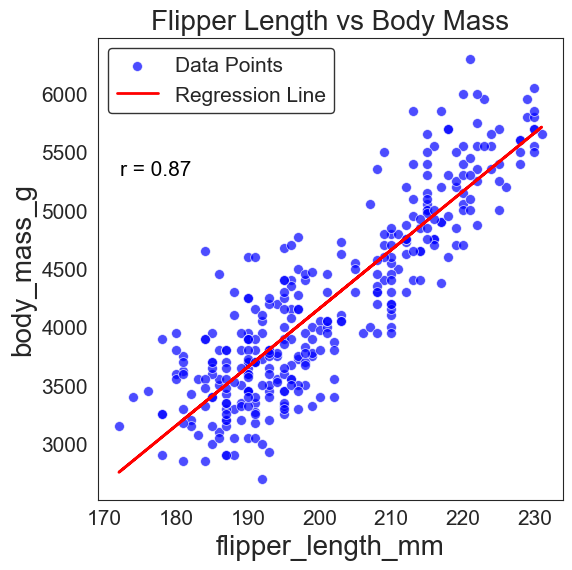

In [16]:
data = penguine_clean
Flipper_length = data['flipper_length_mm']
Body_mass = data['body_mass_g']

# apply function to calculate r2 and r and display the values
from correlation_plot import correlation_plot

# call the function
correlation_plot(None, Flipper_length, Body_mass, "Flipper Length vs Body Mass")
